# **PRÁCTICA 3: GANs - Parte 1: GANs simples**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos


## **Ejercicio 3: Modifica el código para que use capas convolucionales en lugar de densas (en la medida de lo posible).** 

## Importamos librerías 

In [1]:
import os
import numpy as np

from IPython.core.debugger import Tracer

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from keras.datasets.cifar10 import load_data
import tensorflow as tf

import matplotlib.pyplot as plt
plt.switch_backend('agg') # allows code to run without a system DISPLAY

## Cargamos conjunto de datos

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
print("X_train.shape =", x_train.shape, "Y_train.shape =", y_train.shape)
print("X_test.shape =", x_test.shape, "Y_test.shape =", y_test.shape)

X_train.shape = (50000, 32, 32, 3) Y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3) Y_test.shape = (10000, 1)


## Visualizamos cifar10

In [4]:
num_clases = 10
clases = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

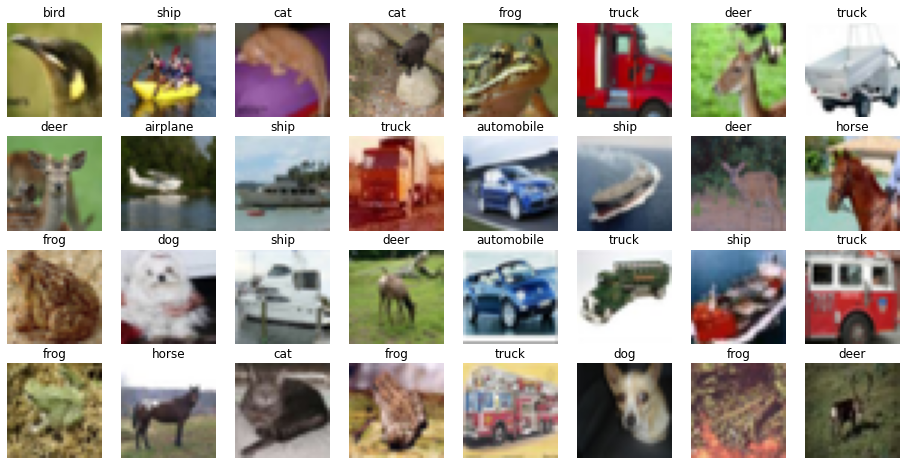

In [5]:
cols = 8 # número de columnas
rows = 4 # número de filas

fig = plt.figure(figsize=(2 * cols, 2 * rows))
for col in range(cols):
    for row in range(rows):
        random_index = np.random.randint(0, len(y_train)) 
        ax = fig.add_subplot(rows, cols, col * rows + row + 1) 
        ax.grid(b=False) 
        ax.axis("off") 
        ax.imshow(x_train[random_index, :]) 
        ax.set_title(clases[y_train[random_index][0]]) 
plt.show() 

## Pre-procesamiento del set de datos

In [6]:
X_train = x_train / 255.0

## Diseñamos modelo

In [7]:
width= x_train.shape[1]
height= x_train.shape[2]
channels= x_train.shape[3]

in_shape = X_train.shape
in_shape = in_shape[1:]
OPTIMZADOR_ADAM = Adam(lr=0.0002, beta_1=0.5, decay=8e-8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
model_gen = Sequential()

# FC: 2x2x512
model_gen.add(Dense(2*2*512, input_shape=(100,)))
model_gen.add(Reshape((2, 2, 512)))
model_gen.add(BatchNormalization())
model_gen.add(LeakyReLU(0.2))

# # Conv 1: 4x4x256
model_gen.add(Conv2DTranspose(256, kernel_size=5, strides=2, padding='same'))
model_gen.add(BatchNormalization())
model_gen.add(LeakyReLU(0.2))

# Conv 2: 8x8x128
model_gen.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))
model_gen.add(BatchNormalization())
model_gen.add(LeakyReLU(0.2))

# Conv 3: 16x16x64
model_gen.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))
model_gen.add(BatchNormalization())
model_gen.add(LeakyReLU(0.2))

# Conv 4: 32x32x3
model_gen.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding='same',
                              activation='tanh'))

model_gen.summary()
model_gen.compile(loss='binary_crossentropy', optimizer=OPTIMZADOR_ADAM)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              206848    
                                                                 
 reshape (Reshape)           (None, 2, 2, 512)         0         
                                                                 
 batch_normalization (BatchN  (None, 2, 2, 512)        2048      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2, 2, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 256)        3277056   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [9]:
model_Disc = Sequential()

# Conv 1: 16x16x64
model_Disc.add(Conv2D(64, kernel_size=5, strides=2, padding='same',
                         input_shape=(in_shape)))
model_Disc.add(LeakyReLU(0.2))

# Conv 2:
model_Disc.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
model_Disc.add(BatchNormalization())
model_Disc.add(LeakyReLU(0.2))

# Conv 3: 
model_Disc.add(Conv2D(256, kernel_size=5, strides=2, padding='same'))
model_Disc.add(BatchNormalization())
model_Disc.add(LeakyReLU(0.2))

# Conv 3: 
model_Disc.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
model_Disc.add(BatchNormalization())
model_Disc.add(LeakyReLU(0.2))

# FC
model_Disc.add(Flatten())

# Output
model_Disc.add(Dense(1, activation='sigmoid'))
model_Disc.summary()

model_Disc.compile(loss='binary_crossentropy', optimizer=OPTIMZADOR_ADAM, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        4864      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         819456    
                                                      

In [10]:
model_gan = Sequential()
model_gan.add(model_gen)
model_gan.add(model_Disc)
model_gan.compile(loss='binary_crossentropy', optimizer=OPTIMZADOR_ADAM)

model_gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         4516739   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 4312193   
                                                                 
Total params: 8,828,932
Trainable params: 8,825,220
Non-trainable params: 3,712
_________________________________________________________________


### Entrenamiento

In [15]:
# Parámetros del entrenamiento
epochs = 5000 
batch = 10

# Bucle entrenamiento
DD_loss = np.zeros((epochs,))
GG_loss = np.zeros((epochs,))

for cnt in range(epochs):

    ## Entrenamos discriminador
        # Imágenes reales
    random_index = np.random.randint(0, len(X_train) - np.int64(batch/2))
    legit_images = X_train[random_index : random_index + np.int64(batch/2)].reshape((np.int64(batch/2),) + in_shape)

        # Imágenes sintéticas
    gen_noise = np.random.normal(0, 1, (np.int64(batch/2), 100))
    syntetic_images = model_gen.predict(gen_noise)
        
        # Combinamos imágenes reales y sintéticas
    x_combined_batch = np.concatenate((legit_images, syntetic_images))
    y_combined_batch = np.concatenate((np.ones((np.int64(batch/2), 1)), np.zeros((np.int64(batch/2), 1))))
        # Entrenamos discriminador
    d_loss = model_Disc.train_on_batch(x_combined_batch, y_combined_batch)

    ## Entrenamos generador
        # Imágenes sintéticas
    noise = np.random.normal(0, 1, (batch, 100))
    y_mislabled = np.ones((batch, 1))
        # Entremaos generador
    g_loss = model_gan.train_on_batch(noise, y_mislabled)

    ## Evolución entrenamiento
    print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))

    DD_loss[cnt] = d_loss[0]
    GG_loss[cnt] = g_loss 

epoch: 0, [Discriminator :: d_loss: 0.000027], [ Generator :: loss: 0.000002]
epoch: 1, [Discriminator :: d_loss: 0.000036], [ Generator :: loss: 0.000002]
epoch: 2, [Discriminator :: d_loss: 0.000016], [ Generator :: loss: 0.000012]
epoch: 3, [Discriminator :: d_loss: 0.000020], [ Generator :: loss: 0.000002]
epoch: 4, [Discriminator :: d_loss: 0.000022], [ Generator :: loss: 0.000004]
epoch: 5, [Discriminator :: d_loss: 0.000035], [ Generator :: loss: 0.000011]
epoch: 6, [Discriminator :: d_loss: 0.000041], [ Generator :: loss: 0.000010]
epoch: 7, [Discriminator :: d_loss: 0.000026], [ Generator :: loss: 0.000016]
epoch: 8, [Discriminator :: d_loss: 0.000024], [ Generator :: loss: 0.000009]
epoch: 9, [Discriminator :: d_loss: 0.000020], [ Generator :: loss: 0.000013]
epoch: 10, [Discriminator :: d_loss: 0.000028], [ Generator :: loss: 0.000062]
epoch: 11, [Discriminator :: d_loss: 0.000030], [ Generator :: loss: 0.000002]
epoch: 12, [Discriminator :: d_loss: 0.000067], [ Generator ::

Curvas de aprendizaje

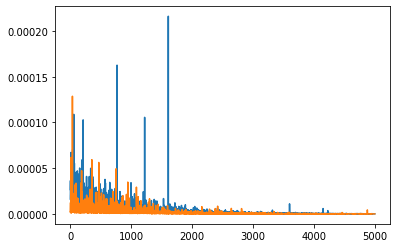

In [16]:
% matplotlib inline 
plt.figure
plt.plot(DD_loss)
plt.plot(GG_loss)

# Generar datos

In [74]:
# Generamos imagen sintética
numero = np.int64(20)
gen_noise = np.random.normal(0, 1, (numero, 100))
syntetic_images = model_gen.predict(gen_noise)

(-0.5, 31.5, 31.5, -0.5)

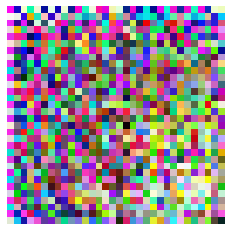

In [75]:
# Mostramos imagen sintética
import cv2
plt.imshow((syntetic_images[0,:,:,:]* 255).astype(np.uint8))
plt.axis('off')

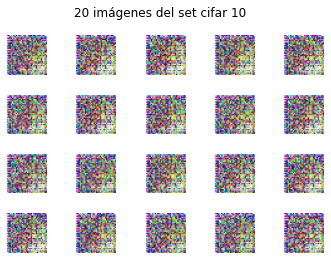

In [76]:
numero=20

for i in range(numero):
  plt.subplot(4,5,i+1)
  #plt.imshow((syntetic_images[i] * 255).astype(np.uint8))
  plt.imshow((syntetic_images[i,:,:,:]* 255).astype(np.uint8))
  plt.subplots_adjust(hspace=0.5)
  plt.suptitle('20 imágenes del set cifar 10')
  plt.axis('off')